In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from plot_lib import plot_data, plot_model, set_default

from sklearn import cluster 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')
set_default()

In [3]:
# Question 1 - Calculate eigenvalues
df = pd.read_csv('wines.csv')
X = StandardScaler().fit_transform(df.values)
pca = PCA(n_components=X.shape[1], whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

eigenvalues = pca.explained_variance_
num_eigen_gt_1 = np.sum(eigenvalues > 1)
print('eigenvalues:',eigenvalues)
print(f"Number of eigenvalues > 1: {num_eigen_gt_1}")

eigenvalues: [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
Number of eigenvalues > 1: 3


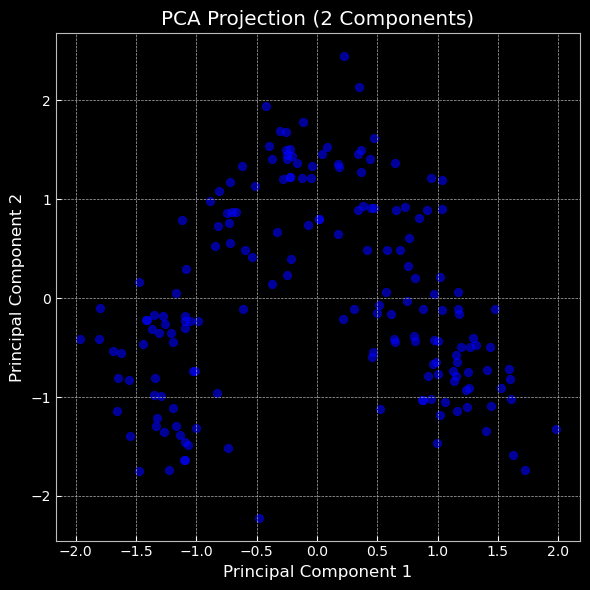

The explained variance of PC1 is 36.20%
The explained variance of PC2 is 19.21%
The total explained variance is 55.41%


In [5]:
# Question 1 - Plotting 2D solution
X = StandardScaler().fit_transform(df.values)

# PCA with 2 components
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

# Scatter plot: since no class labels, plot all points in one color
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

# Plot the PCA points
ax.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.6)

# Axis labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Projection (2 Components)')

plt.grid(True)
plt.tight_layout()
plt.show()

# Explained variance
explained_var = pca.explained_variance_ratio_
print(f'''The explained variance of PC1 is {explained_var[0]:.2%}
The explained variance of PC2 is {explained_var[1]:.2%}
The total explained variance is {explained_var.sum():.2%}''')

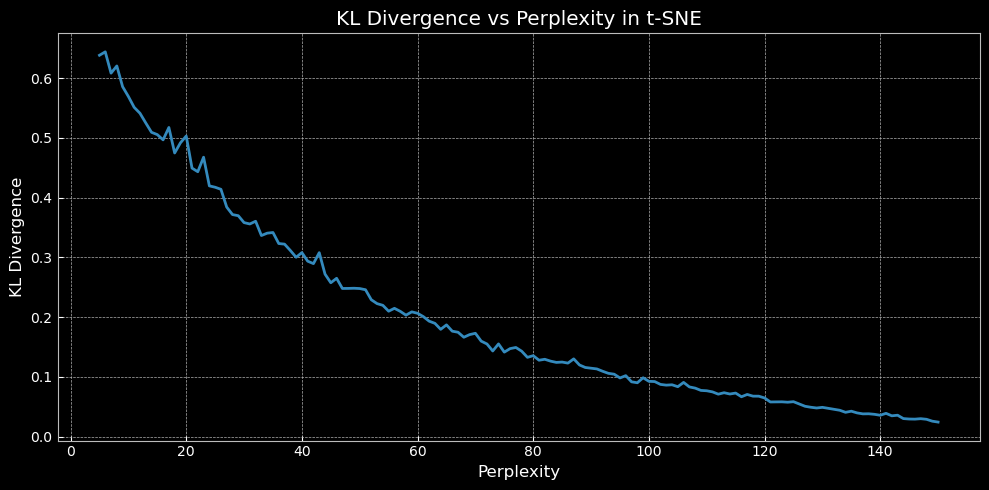

In [273]:
# Question 2 - Divergence vs Perplexity
# Load and standardize the data (no header if it's pure numeric)
df = pd.read_csv("wines.csv")
X = StandardScaler().fit_transform(df)

# Evaluate KL divergence across a range of perplexities
perplexities = range(5, 151)
kl_divergences = []

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, n_jobs=-1, init='pca')
    tsne.fit_transform(X) 
    kl_divergences.append(tsne.kl_divergence_)

# Plot KL divergence vs. Perplexity
plt.figure(figsize=(10, 5))
plt.plot(perplexities, kl_divergences)
plt.title("KL Divergence vs Perplexity in t-SNE")
plt.xlabel("Perplexity")
plt.ylabel("KL Divergence")
plt.grid(True)
plt.tight_layout()
plt.show()

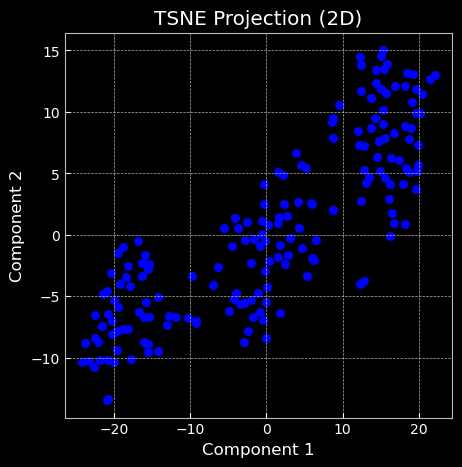

In [281]:
# Question 2 - 2D plot
X_embedded = TSNE(n_components=2, perplexity=20, n_jobs=-1).fit_transform(X)
plt.figure(figsize=(5, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c='blue')
plt.title("TSNE Projection (2D)")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Stress of 2D MDS embedding: 22536.8258


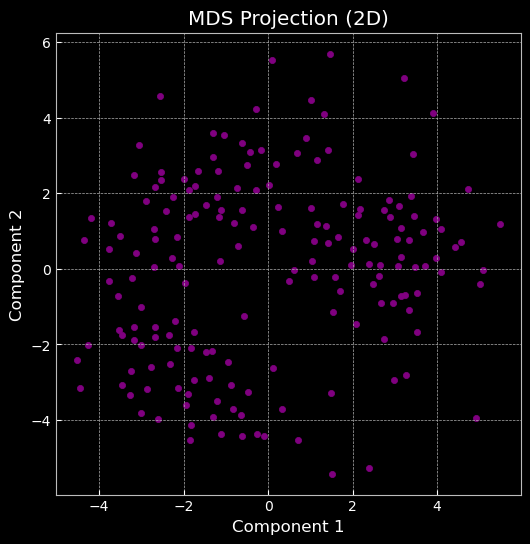

In [249]:
# Question 3
df = pd.read_csv('wines.csv')
X = StandardScaler().fit_transform(df)

# Run MDS
mds = MDS(n_components=2, normalized_stress='auto', dissimilarity='euclidean')
X_mds = mds.fit_transform(X)
print(f"Stress of 2D MDS embedding: {mds.stress_:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c='purple', s=20)
plt.title("MDS Projection (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

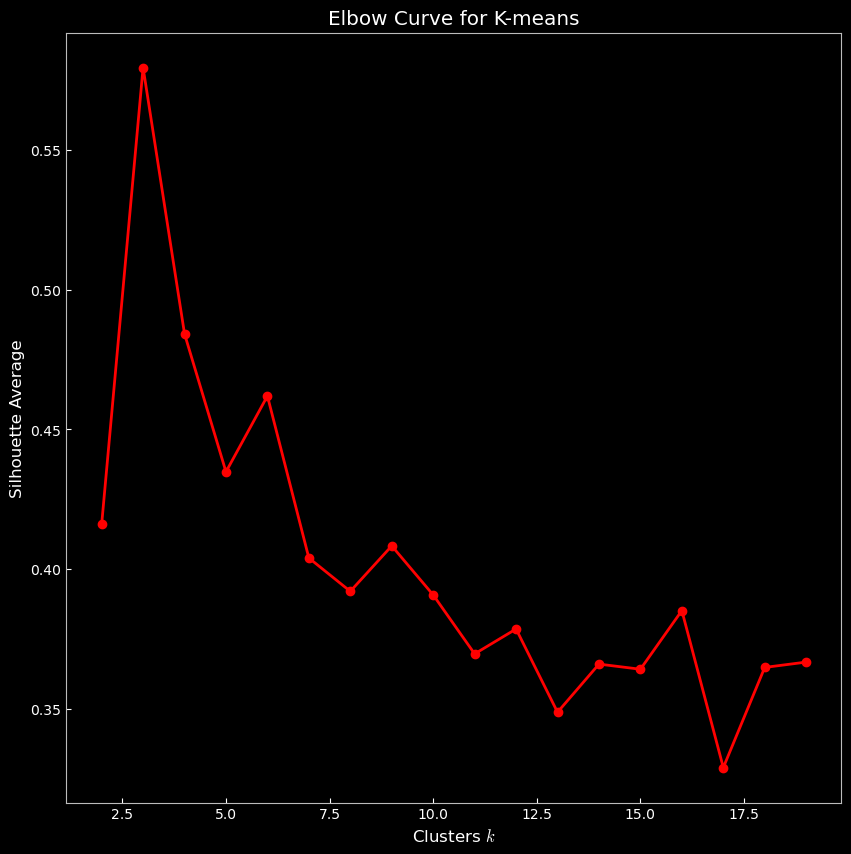

In [3]:
# Question 4 - optimal number of clusters for PCA
df = pd.read_csv('wines.csv')
X = StandardScaler().fit_transform(df)
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)
silhouettes = []
k_range = range(2, 20)

for k in k_range:
    kmeans = cluster.KMeans(k, n_init='auto')
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouettes.append(score)
    
plt.plot(list(k_range), silhouettes, 'r-o', lw = 2)
plt.xlabel(r'Clusters $k$')
plt.ylabel(r'Silhouette Average')
plt.title(r'Elbow Curve for K-means')
plt.grid()
plt.show()

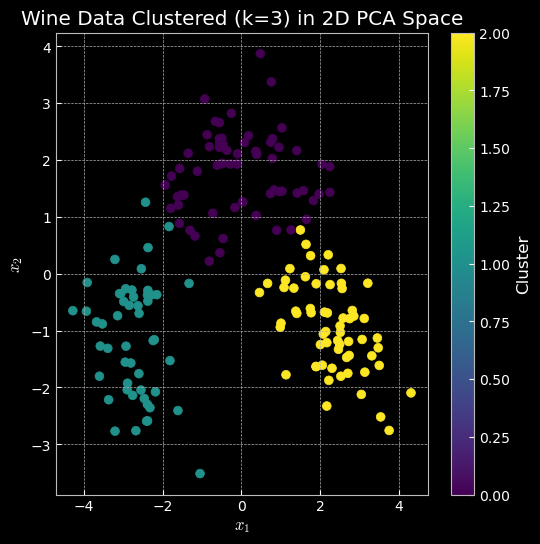

In [6]:
# Question 4 - kMeans plot
X_2d = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=40)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Wine Data Clustered (k=3) in 2D PCA Space')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [8]:
# Question 4 - Compute distance
final_kmeans = cluster.KMeans(n_clusters=3, n_init='auto', random_state=0)
final_labels = final_kmeans.fit_predict(X_2d)
inertia = final_kmeans.inertia_

print(f"Total within-cluster sum of distances: {inertia:.4f}")

Total within-cluster sum of distances: 260.0167


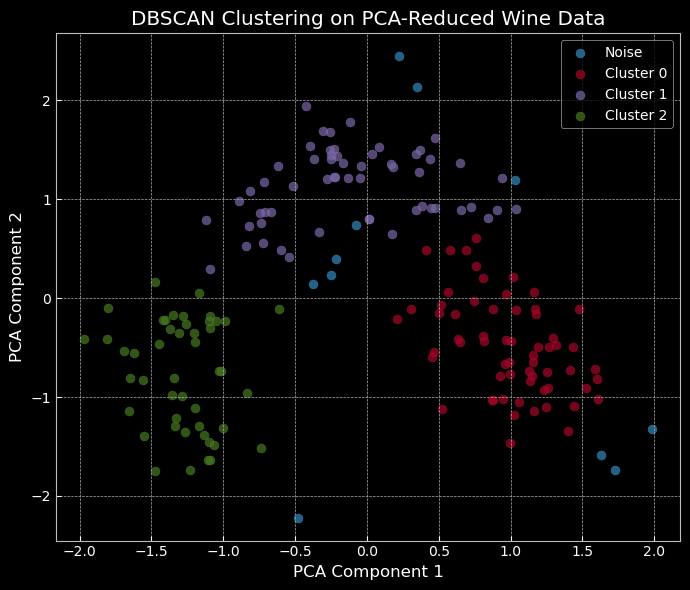

In [60]:
# Question 5 - 2D plot on PCA with eps = 0.4 & min_samples = 5
df = pd.read_csv('wines.csv')
X = StandardScaler().fit_transform(df)

X_pca = PCA(n_components=2,whiten=True).fit_transform(X)

dbscan = DBSCAN(eps=0.4, min_samples=10)  # You can tune eps and min_samples
labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(7, 6))
unique_labels = np.unique(labels)
for label in unique_labels:
    mask = labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                label=f"Cluster {label}" if label != -1 else "Noise",
                s=40, alpha=0.7)

plt.title("DBSCAN Clustering on PCA-Reduced Wine Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [303]:
# Question 5 - hyperparameters
df = pd.read_csv("wines.csv")
X = StandardScaler().fit_transform(df.values)  # Always standardize before clustering

# Reduce to 2D for plotting & comparison
X_pca = PCA(n_components=2,whiten=True).fit_transform(X)

max_score = 0
for i in [0.1,0.2,0.3,0.4,0.5,0.5,0.7,0.8,0.9]:
    for j in range(1,15):
        db_model = DBSCAN(eps = i, min_samples = j).fit(X_pca)
        labels = db_model.labels_
        score = silhouette_score(X_pca, labels) if len(set(labels)) > 1 else -1
        
        if score > max_score or max_score == 0:
            max_score = score
            optimal_eps = i
            optimal_min_samples = j

# Print results
print(f"Hightest Silhouette Score (eps = {optimal_eps} , min_samples = {optimal_min_samples}): {max_score:.4f}")

Hightest Silhouette Score (eps = 0.4 , min_samples = 10): 0.5038


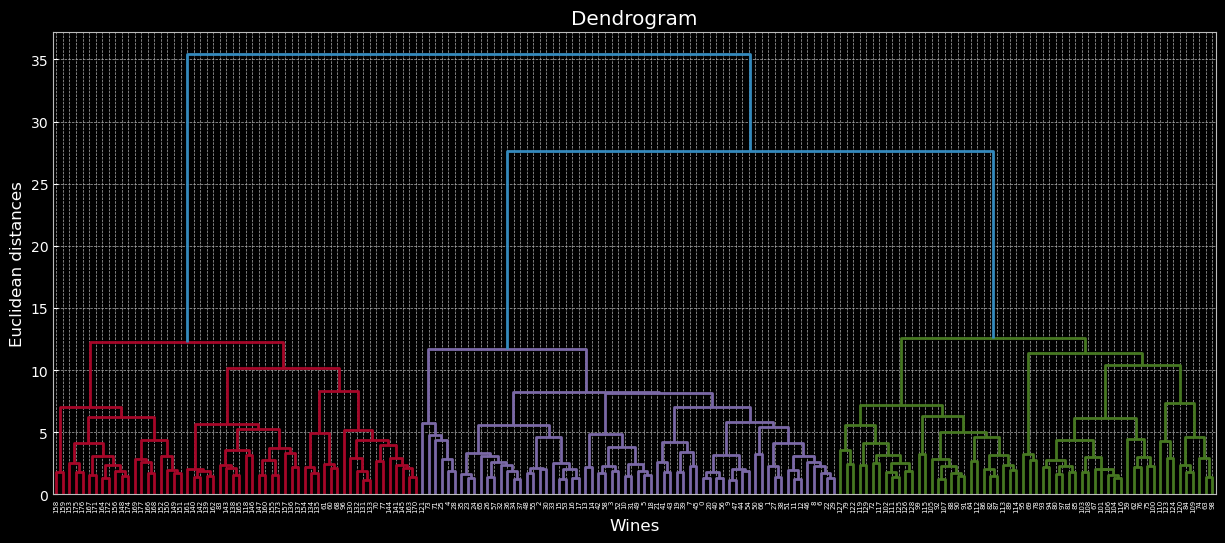

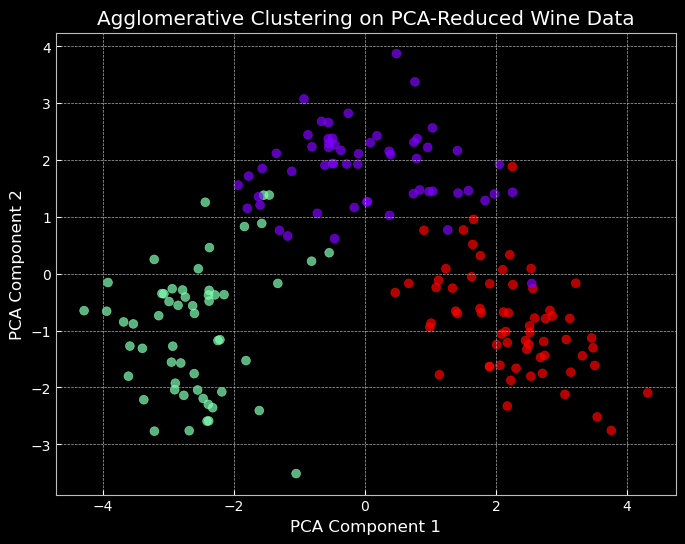

In [28]:
# Extra b
df = pd.read_csv("wines.csv")
X = StandardScaler().fit_transform(df.values)

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean distances')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(X)

X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=40, alpha=0.7)
plt.title("Agglomerative Clustering on PCA-Reduced Wine Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()